# Lezione 1 - Esercizi

#### Prendiamo dimestichezza con Python dentro al Jupyter Notebook e con le librerie per fare grafici.

Provate a svolgere i seguenti esercizi: <br>
1) [Fattoriale](#section1)<a href='#section1'></a> <br>
2) [Serie di Fibonacci](#section2)<a href='#section2'></a><br>
3) [Esempio di Plot](#section3)<a href='#section3'></a> <br>
4) [Esercizio di Plot di un file root](#section4)<a href='#section4'></a> <br>


<a id='section1'></a>
## 1) Fattoriale

Scrivere in Python una funzione fatt che calcola il fattoriale di un numero dato come parametro. <br>
Se siete coraggiosi provate a scriverla ricorsiva!

In [9]:
def fatt(d):
    """ La funzione calcola il fattoriale del numero d passato come parametro.
    La funzione restituisce -1 in caso di errore.
    
    >>> fatt(6)
    720
    """
    
    if type(d) is not int or not d >= 0:
        print("Errore il fattoriale si calcola solo su numeri positivi!")
        return -1
    
    risultato = 1
    for n in range(1, d + 1):
        risultato *= n
    
    return risultato


fatt(6)

720

In [10]:
def fatt(d):
    """ La funzione calcola il fattoriale del numero d passato come parametro.
    La funzione restituisce -1 in caso di errore.
    
    >>> fatt(6)
    720
    """
    
    if type(d) is not int or not d >= 0:
        print("Errore il fattoriale si calcola solo su numeri positivi!")
        return -1
    
    if d == 0:
        return 1
    
    return d * fatt(d-1)


fatt(6)

720

<a id='section2'></a>
## 2) Serie di Fibonacci

Scrivere una funzione Python che restituisce i primi n numeri della serie di Fibonacci.

In [36]:
def fibonacci(nterms):
    """ La funzione restituisce una lista con i primi nterms numeri della serie di Fibonacci.
    
    >>> fib(10)
    [0, 1, 1, 2, 3, 5, 8, 13, 21, 34]
    """
    
    if type(nterms) is not int or not nterms >= 0:
        print("Il parametro deve essere un numero e deve essere maggiore di zero!")
        return None

    # primi due numeri della serie
    n1, n2 = 0, 1
    
    lista = []
    for count in range(0, nterms):
         lista.append(n1)
         n1, n2 = n2, n1 + n2

    return lista

fibonacci(10)

[0, 1, 1, 2, 3, 5, 8, 13, 21, 34]

<a id='section3'></a>
## 3) Esempio di plot

Per fare dei grafici è possibile utilizzare la libreria `matplotlib`.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
help(np.linspace)

Help on function linspace in module numpy:

linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None, axis=0)
    Return evenly spaced numbers over a specified interval.
    
    Returns `num` evenly spaced samples, calculated over the
    interval [`start`, `stop`].
    
    The endpoint of the interval can optionally be excluded.
    
    .. versionchanged:: 1.16.0
        Non-scalar `start` and `stop` are now supported.
    
    Parameters
    ----------
    start : array_like
        The starting value of the sequence.
    stop : array_like
        The end value of the sequence, unless `endpoint` is set to False.
        In that case, the sequence consists of all but the last of ``num + 1``
        evenly spaced samples, so that `stop` is excluded.  Note that the step
        size changes when `endpoint` is False.
    num : int, optional
        Number of samples to generate. Default is 50. Must be non-negative.
    endpoint : bool, optional
        If True, `stop` is

In [3]:
x1 = np.linspace(0.0, 5.0)
x2 = np.linspace(0.0, 5.0)

y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
y2 = np.cos(2 * np.pi * x2)

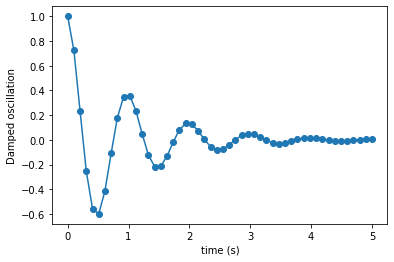

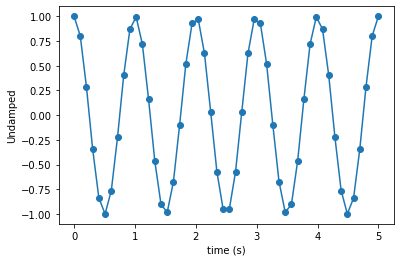

In [4]:
plt.plot(x1, y1, 'o-')
plt.xlabel('time (s)')
plt.ylabel('Damped oscillation')
plt.show()

plt.plot(x2, y2, 'o-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')
plt.show()

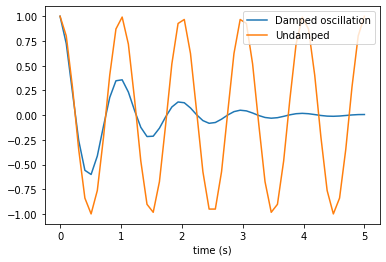

In [45]:
import seaborn as sns
ax = sns.lineplot(x1, y1, label='Damped oscillation')
ax = sns.lineplot(x2, y2, label='Undamped')
ax.set(xlabel='time (s)')
ax.legend(loc='upper right')

<a id='section4'></a>
## 4) Esercizio di Plot di un file root

In questo esercizio utilizzeremo anche una libreria aggiuntiva che si chiama `uproot` e che serve a leggere i files in formato root.

In [41]:
!pip install uproot

In [7]:
import uproot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

treename = 'HZZ4LeptonsAnalysisReduced'
filename ='data/ntuple_4mu_bkg.root'

upfile = uproot.open(filename)
params = upfile[treename].arrays() # dictionary of NumPy arrays

VARS = [b'f_mass4l', b'f_massjj']
df = pd.DataFrame(params, columns=VARS)
print (df)

       b'f_mass4l'  b'f_massjj'
0        91.098129  -999.000000
1       201.847610  -999.000000
2        89.279076  -999.000000
3       586.597412  1353.025513
4       135.589798  -999.000000
...            ...          ...
58102    89.582817  -999.000000
58103   252.845184  -999.000000
58104    90.129845  -999.000000
58105   250.977417  -999.000000
58106   229.470154  -999.000000

[58107 rows x 2 columns]


In [25]:
df.describe()

,b'f_mass4l',b'f_massjj'
count,58107.000000,58107.000000
mean,214.346069,-891.822449
std,123.011841,352.657990
min,70.003792,-999.000000
25%,112.146431,-999.000000
50%,204.004684,-999.000000
75%,259.251389,-999.000000
max,2275.151367,2427.755859


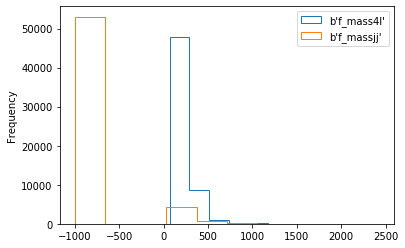

In [29]:
ax = df[VARS[0]].plot.hist(bins=10, label=VARS[0], histtype='step')
ax = df[VARS[1]].plot.hist(bins=10, label=VARS[1], histtype='step')
plt.legend(loc='upper right')

(0, 1000)

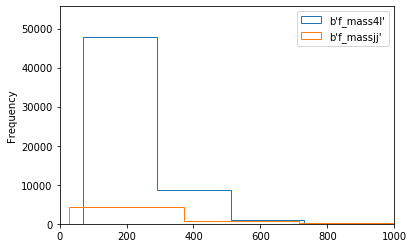

In [30]:
ax = df[VARS[0]].plot.hist(bins=10, label=VARS[0], histtype='step')
ax = df[VARS[1]].plot.hist(bins=10, label=VARS[1], histtype='step')
plt.legend(loc='upper right')

ax.set_xlim(0, 1000)

(0, 1000)

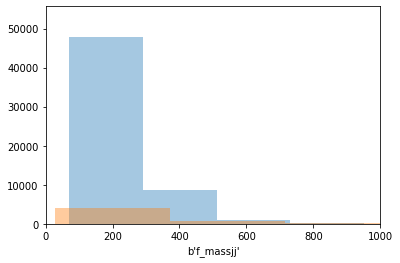

In [43]:
import seaborn as sns
ax = sns.distplot(df[VARS[0]], bins=10, kde=False)
ax = sns.distplot(df[VARS[1]], bins=10, kde=False)

ax.set_xlim(0, 1000)

(0, 1000)

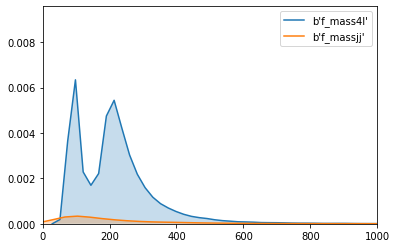

In [32]:
ax = sns.kdeplot(df[VARS[0]], shade=True)
ax = sns.kdeplot(df[VARS[1]], shade=True)

ax.set_xlim(0, 1000)

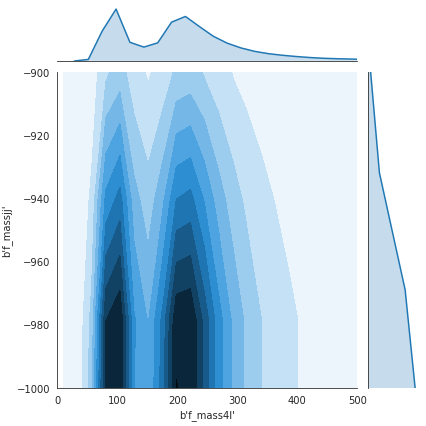

In [39]:
with sns.axes_style('white'):
    ax = sns.jointplot(VARS[0], VARS[1], df, kind='kde', xlim=(0, 500), ylim=(-1000, -900))

[Clicca qui per tornare all'inizio della pagina](#start)<a id='start'></a>